<a href="https://colab.research.google.com/github/viveknandakumar136/url/blob/main/Copy_of_URL_Validator_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from warnings import filterwarnings
from datetime import datetime
import re
import os
filterwarnings("ignore")

#Iteration
import itertools

#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

#for Text Mining
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import WordNetLemmatizer
import nltk
from nltk.corpus import inaugural
from nltk.draw.dispersion import dispersion_plot
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score,recall_score,precision_score

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
%matplotlib inline

#Set the max number of rows in output cell to 30
pd.options.display.max_rows = 30


#Ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
#!pip install Flask==2.3.2
#from flask import Flask, request, jsonify
#import re
##import nltk
#from nltk.corpus import stopwords
#from nltk import WordNetLemmatizer
#from sklearn.feature_extraction.text import CountVectorizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

url_data = pd.read_csv("/content/drive/MyDrive/csic_database 2.xlsx - Sheet 1 - csic_database 2.csv")
url_data

,URL,Flag
0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,0
1,http://localhost:8080/tienda1/publico/anadir.j...,0
2,http://localhost:8080/tienda1/publico/anadir.j...,0
3,http://localhost:8080/tienda1/publico/autentic...,0
4,http://localhost:8080/tienda1/publico/autentic...,0
...,...,...
61060,http://localhost:8080/tienda1/miembros/editar....,1
61061,http://localhost:8080/tienda1/miembros/editar....,1
61062,http://localhost:8080/tienda1/miembros/editar....,1
61063,http://localhost:8080/tienda1/imagenes/3.gif/ ...,1


In [5]:
# Initialize Flask app
#app = Flask(__name__)

NameError: name 'Flask' is not defined

In [4]:
# Function to extract subdomain and domain using regex
def extract_full_domain(url):
    # match = re.search(r'https?://(?:www\.)?([^/]+)', url)
    match = re.search(r'https?://([^/]+)', url)  # Capture everything after 'https://' and before the first '/'
    if match:
        return match.group(1)  # Return the full domain (including subdomains)
    return None

# Apply the function to the 'URL' column and create a new 'Full Domain' column
url_data['Full Domain'] = url_data['URL'].apply(extract_full_domain)

# Move the 'Full Domain' column before the 'Flag' column
cols = url_data.columns.tolist()  # Get the list of columns
cols = cols[:-2] + ['Full Domain'] + ['Flag']  # Reorder columns
url_data = url_data[cols]
url_data

,URL,Full Domain,Flag
0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,localhost:8080,0
1,http://localhost:8080/tienda1/publico/anadir.j...,localhost:8080,0
2,http://localhost:8080/tienda1/publico/anadir.j...,localhost:8080,0
3,http://localhost:8080/tienda1/publico/autentic...,localhost:8080,0
4,http://localhost:8080/tienda1/publico/autentic...,localhost:8080,0
...,...,...,...
61060,http://localhost:8080/tienda1/miembros/editar....,localhost:8080,1
61061,http://localhost:8080/tienda1/miembros/editar....,localhost:8080,1
61062,http://localhost:8080/tienda1/miembros/editar....,localhost:8080,1
61063,http://localhost:8080/tienda1/imagenes/3.gif/ ...,localhost:8080,1


In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# Text Preprocessing: Tokenize -> Clean -> Remove Stop words -> Lemmatize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(doc):
    # Tokenize the text first
    tokens = nltk.word_tokenize(doc)
    # Clean for special characters and convert text to lowercase
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token.lower() not in stop_words]
    return ' '.join(tokens)

In [9]:
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(url_data['Full Domain'])

# N-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))
X_ngram = ngram_vectorizer.fit_transform(url_data['Full Domain'])

In [10]:
def best_model(clf, param_grid, X, Y):
    grid = GridSearchCV(clf, param_grid, scoring='accuracy', verbose=True, cv=10)
    grid.fit(X, Y)
    best_clf = grid.best_estimator_
    best_params = grid.best_params_
    return best_clf, best_params

# Specify parameter grid for each model
param_grids = {
    MultinomialNB(): {'alpha': [0.01, 0.1, 1.0]},
    LogisticRegression(): {'solver': ['newton-cg', 'sag', 'saga']},
    RandomForestClassifier(): {'n_estimators': [500, 1000]},
    SVC(): {'kernel': ['linear', 'rbf']}
}

In [13]:
# Function to train and evaluate models
def doc_clf_model(clf, param_grid, X, Y):
    best_clf, best_params = best_model(clf, param_grid, X, Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=23, stratify=Y)
    best_clf.fit(X_train, Y_train)
    accuracy = accuracy_score(Y_test, best_clf.predict(X_test))
    recall = recall_score(Y_test, best_clf.predict(X_test), average='macro')
    precision = precision_score(Y_test, best_clf.predict(X_test), average='macro')
    return best_clf, accuracy, recall, precision, best_params

# Initialize DataFrames
model_performance = pd.DataFrame(columns=["Model", "Accuracy", "Recall", "Precision", "Best Params"])
Doc_df = pd.DataFrame({'Full Domain': url_data['Full Domain'], 'Actual_Label': url_data['Flag']})

# Train models and evaluate performance
for model, param_grid in param_grids.items():
    clf, accuracy, recall, precision, best_params = doc_clf_model(model, param_grid, X_ngram, url_data['Flag'])
    temp_df = pd.DataFrame({
        "Model": clf.__class__.__name__,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "Best Params": best_params
    })
    model_performance = pd.concat([model_performance, temp_df], ignore_index=True)
    Doc_df[f'Predicted_Label_{model.__class__.__name__}'] = clf.predict(X_ngram)

# Display model performance
model_performance.round(3)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits
Fitting 10 folds for each of 2 candidates, totalling 20 fits


,Model,Accuracy,Recall,Precision,Best Params
0,MultinomialNB,0.594,0.505,0.796,0.01
1,LogisticRegression,0.594,0.505,0.796,newton-cg
2,RandomForestClassifier,0.594,0.505,0.796,500
3,SVC,0.594,0.505,0.796,linear


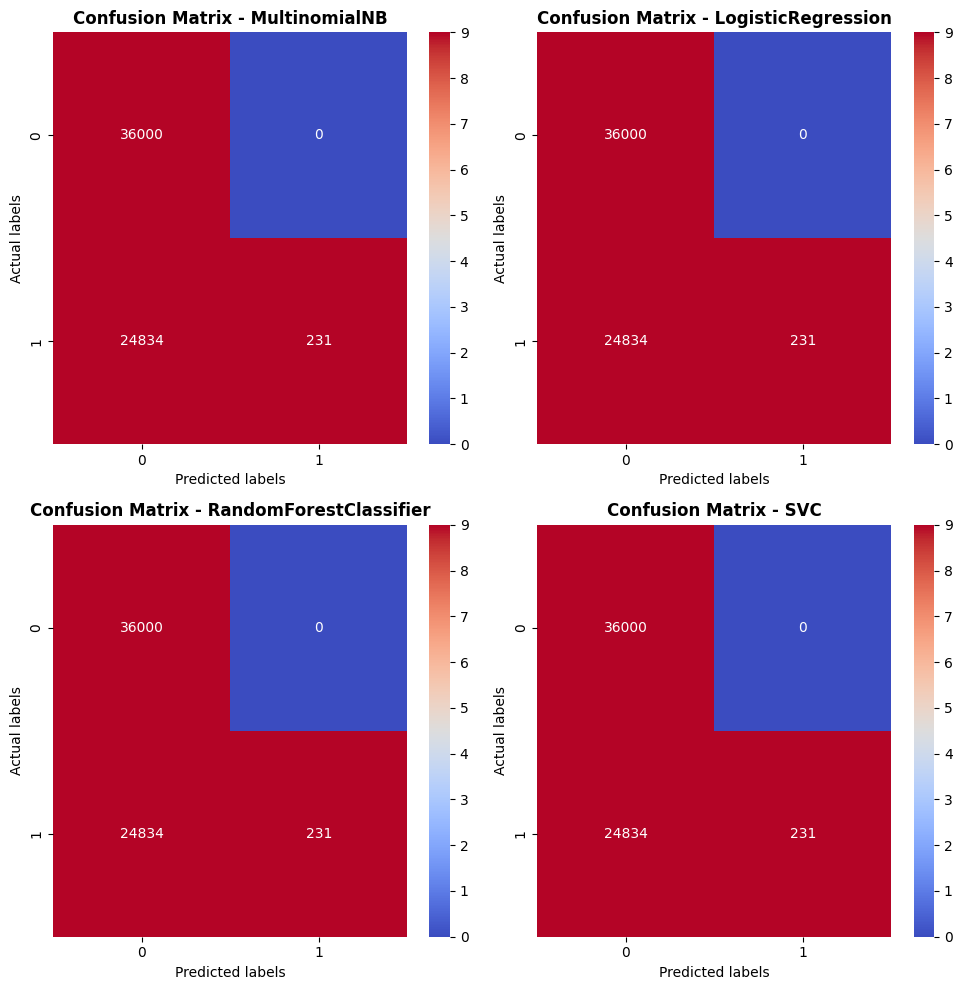

In [14]:
# Plotting confusion matrices for the different models
plt.figure(figsize=(10, 10))
for i, model in enumerate(param_grids.keys()):
    plt.subplot(2, 2, i + 1)
    model_name = model.__class__.__name__
    pvt_tbl = pd.crosstab(Doc_df["Actual_Label"], Doc_df[f'Predicted_Label_{model_name}'])
    plt.title(f"Confusion Matrix - {model_name}", fontsize=12, weight="bold")
    sns.heatmap(pvt_tbl, cmap='coolwarm', annot=True, fmt='.5g', vmin=0, vmax=9)
    plt.ylabel('Actual labels')
    plt.xlabel('Predicted labels')

plt.tight_layout()
plt.show()